In [ ]:
!nvidia-smi

Mon Jul  1 05:47:39 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 19.1 MB/s eta 0:00:00


In [ ]:
!pip install -q supervision roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.7 MB/s eta 0:00:00


In [ ]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt
!ls -lh {HOME}/weights

total 408M
-rw-r--r-- 1 root root  80M May 26 15:53 yolov10b.pt
-rw-r--r-- 1 root root 100M May 26 15:53 yolov10l.pt
-rw-r--r-- 1 root root  64M May 26 15:54 yolov10m.pt
-rw-r--r-- 1 root root  11M May 26 15:54 yolov10n.pt
-rw-r--r-- 1 root root  32M May 26 15:54 yolov10s.pt
-rw-r--r-- 1 root root 123M May 26 15:54 yolov10x.pt


In [ ]:
%cd {HOME}

/content


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="aj1YNkFeRPD8FAf7DMpN")
project = rf.workspace("opticaldisk").project("opticaldisk")
version = project.version(2)
dataset = version.download("yolov9")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Opticaldisk-2 in yolov9:: 100%|██████████| 1752/1752 [00:00<00:00, 4265.90it/s]


In [ ]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [ ]:
%cd {HOME}

!yolo task=detect mode=train epochs=57 batch=16 plots=True \
model={HOME}/weights/yolov10s.pt \
data={dataset.location}/data.yaml

/content
New https://pypi.org/project/ultralytics/8.2.48 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/weights/yolov10s.pt, data=/content/Opticaldisk-2/data.yaml, epochs=57, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, reti

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					   R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			   results.csv		val_batch0_pred.jpg
confusion_matrix.png				   results.png		val_batch1_labels.jpg
events.out.tfevents.1719813018.605a96552769.973.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					   train_batch1.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				   train_batch2162.jpg	val_batch2_pred.jpg
labels.jpg					   train_batch2163.jpg	weights
P_curve.png					   train_batch2164.jpg
PR_curve.png					   train_batch2.jpg


/content


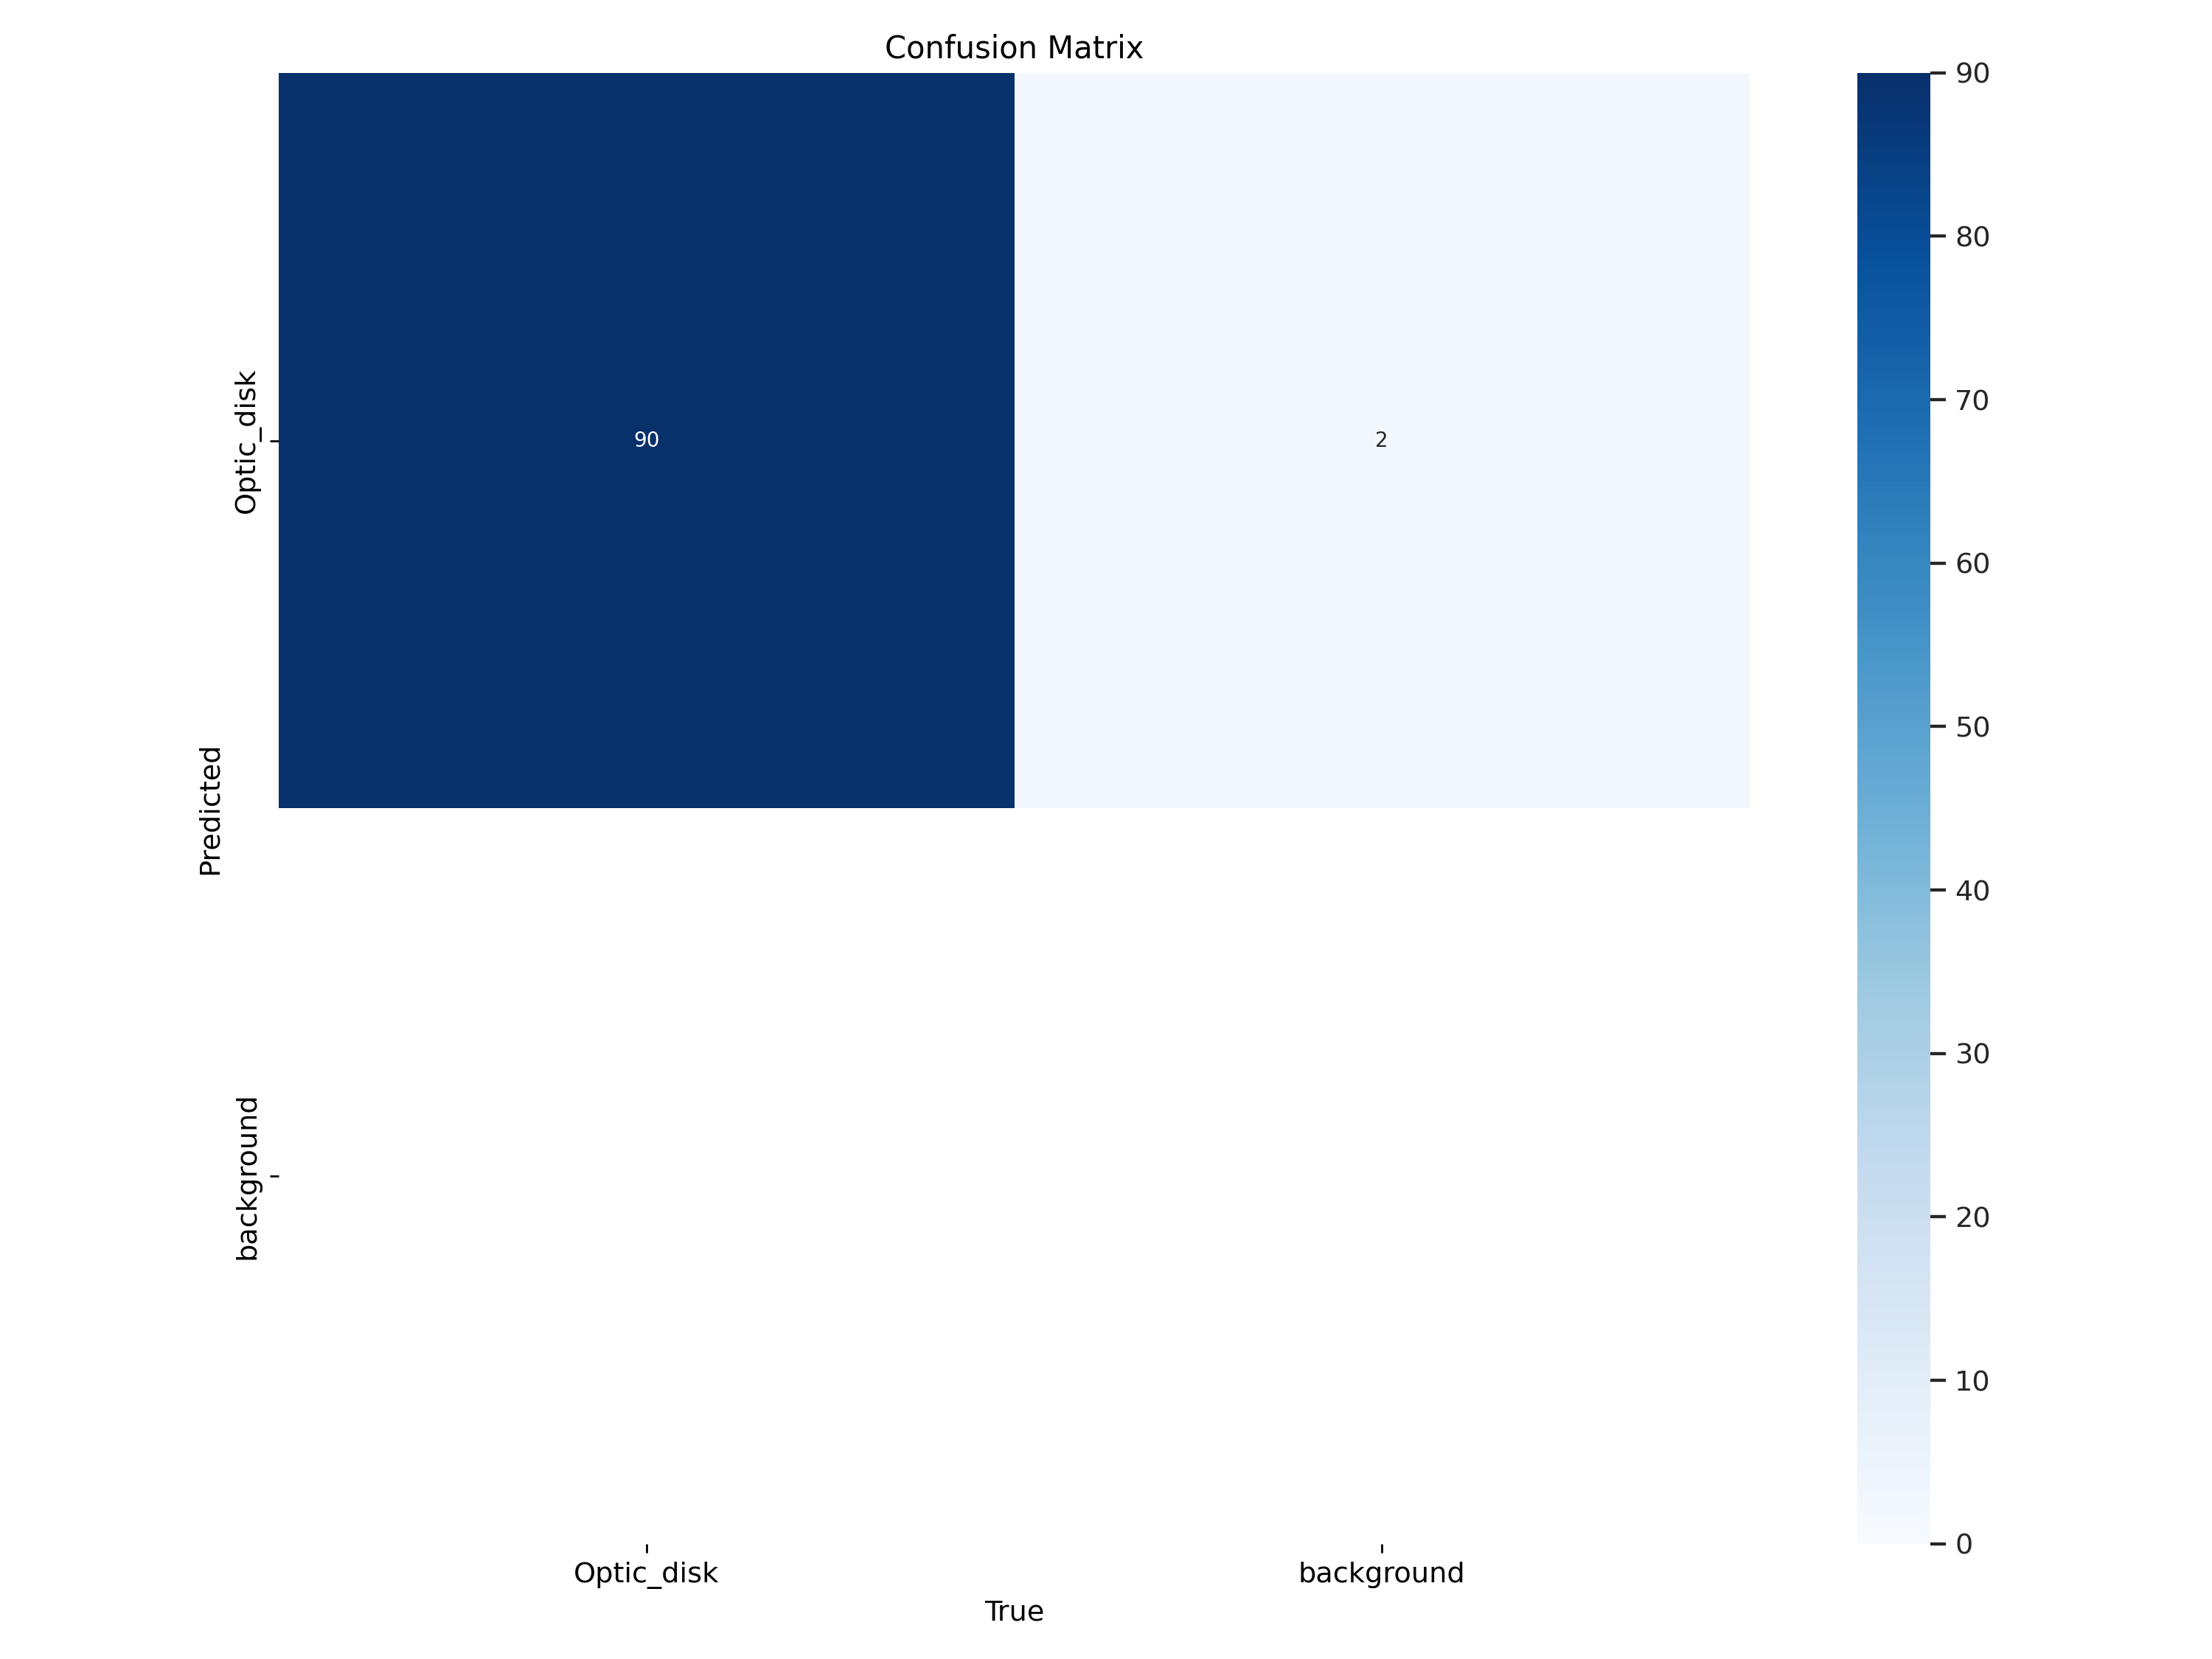

In [ ]:
from IPython.display import Image

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)


In [ ]:
# Confusion matrix values
TP = 90
FP = 2
FN = 0
TN = 0

# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Precision
precision = TP / (TP + FP)

# Recall (Sensitivity)
recall = TP / (TP + FN)

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

accuracy, precision, recall, f1_score


(0.9782608695652174, 0.9782608695652174, 1.0, 0.989010989010989)

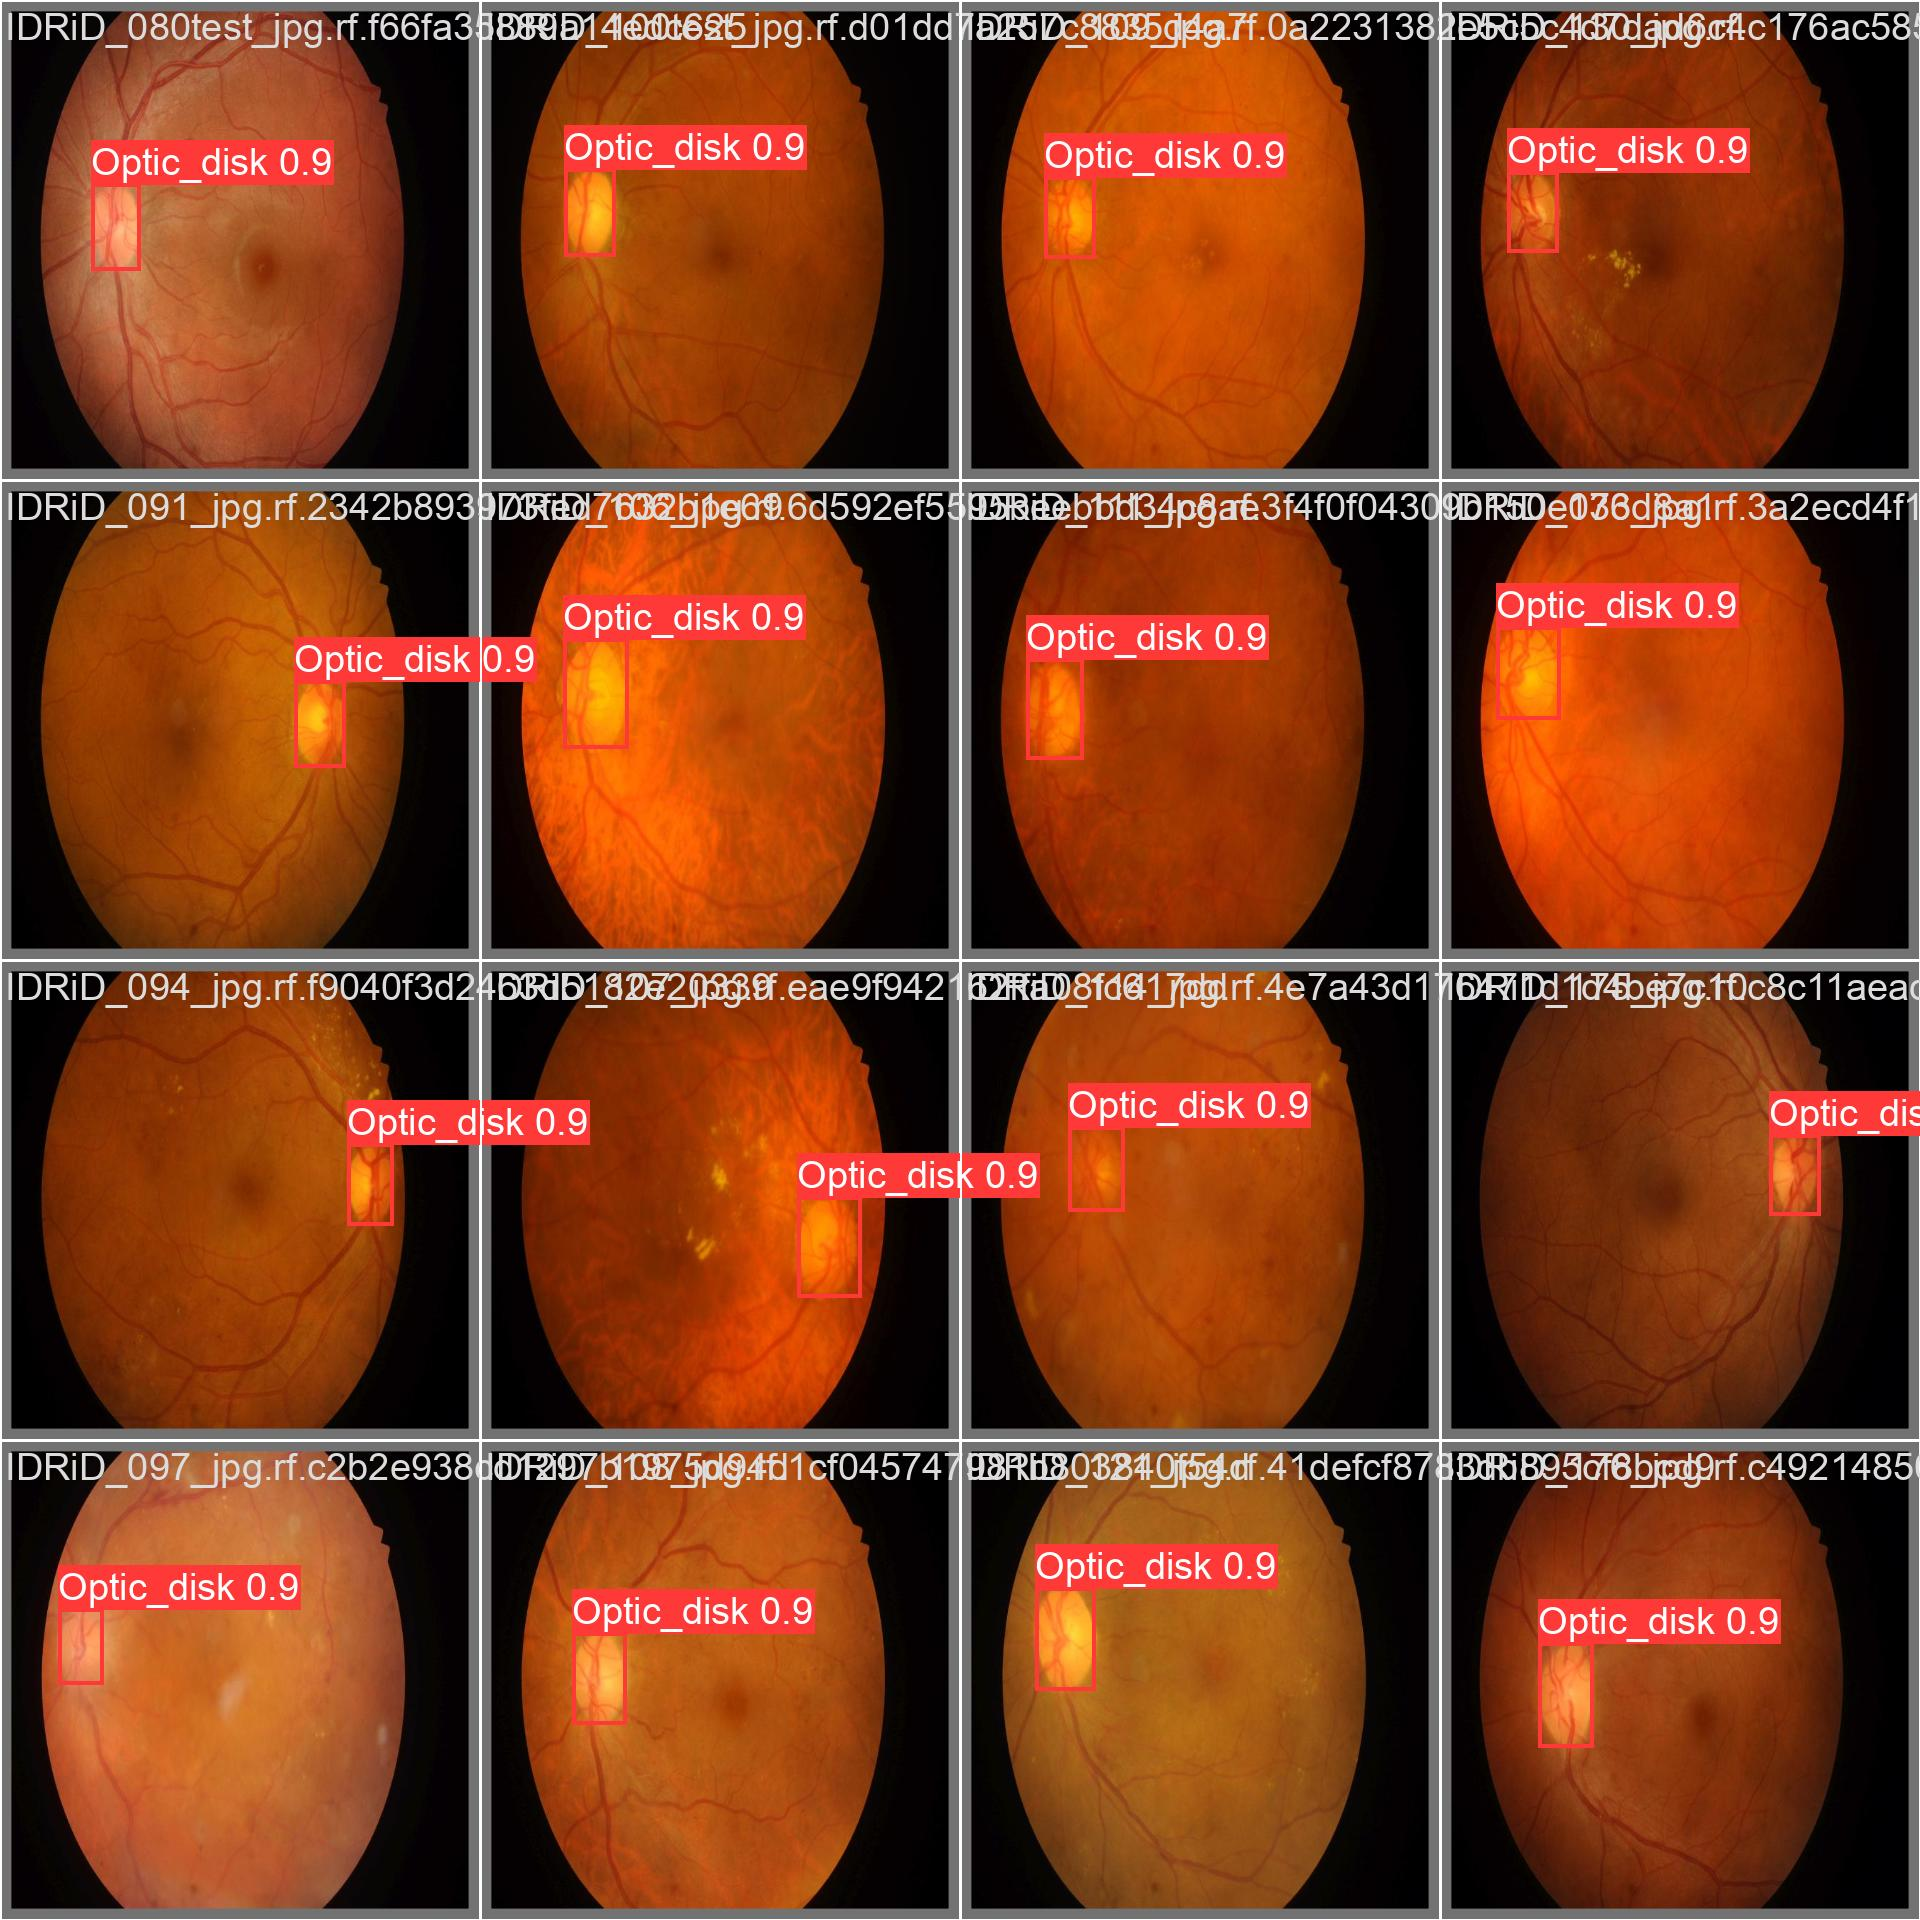

In [ ]:
from IPython.display import Image

image_path = f'{HOME}/runs/detect/train/val_batch1_pred.jpg'
Image(filename=image_path, width=3000, height=850)


In [ ]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10s summary (fused): 293 layers, 8035734 parameters, 0 gradients, 24.4 GFLOPs
val: Scanning /content/Opticaldisk-2/valid/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100% 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:06<00:00,  1.16s/it]
                   all         90         90      0.998      0.989      0.995      0.825
Speed: 16.1ms preprocess, 19.6ms inference, 0.0ms loss, 5.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10s summary (fused): 293 layers, 8035734 parameters, 0 gradients, 24.4 GFLOPs

image 1/44 /content/Opticaldisk-2/test/images/IDRiD_007test_jpg.rf.f818958ddd0d4f243d94e074a1fe7deb.jpg: 640x640 1 Optic_disk, 17.0ms
image 2/44 /content/Opticaldisk-2/test/images/IDRiD_008_jpg.rf.57b077fe471d548dfceafaed248b0d3a.jpg: 640x640 1 Optic_disk, 16.8ms
image 3/44 /content/Opticaldisk-2/test/images/IDRiD_010test_jpg.rf.09437bd92173f1aa6b83717b5bcc1d93.jpg: 640x640 1 Optic_disk, 16.7ms
image 4/44 /content/Opticaldisk-2/test/images/IDRiD_027test_jpg.rf.81757d3c3a9065dde5771a29ba947f0e.jpg: 640x640 1 Optic_disk, 16.7ms
image 5/44 /content/Opticaldisk-2/test/images/IDRiD_038_jpg.rf.05f76fb773c483ae4410f122c0975b32.jpg: 640x640 1 Optic_disk, 16.7ms
image 6/44 /content/Opticaldisk-2/test/images/IDRiD_045_jpg.rf.8bee801fe36593799248b4c1cfdcf5d7.jpg: 640x640 1 Optic_disk, 16.7ms
image 7/44 /content/Opticald

/content


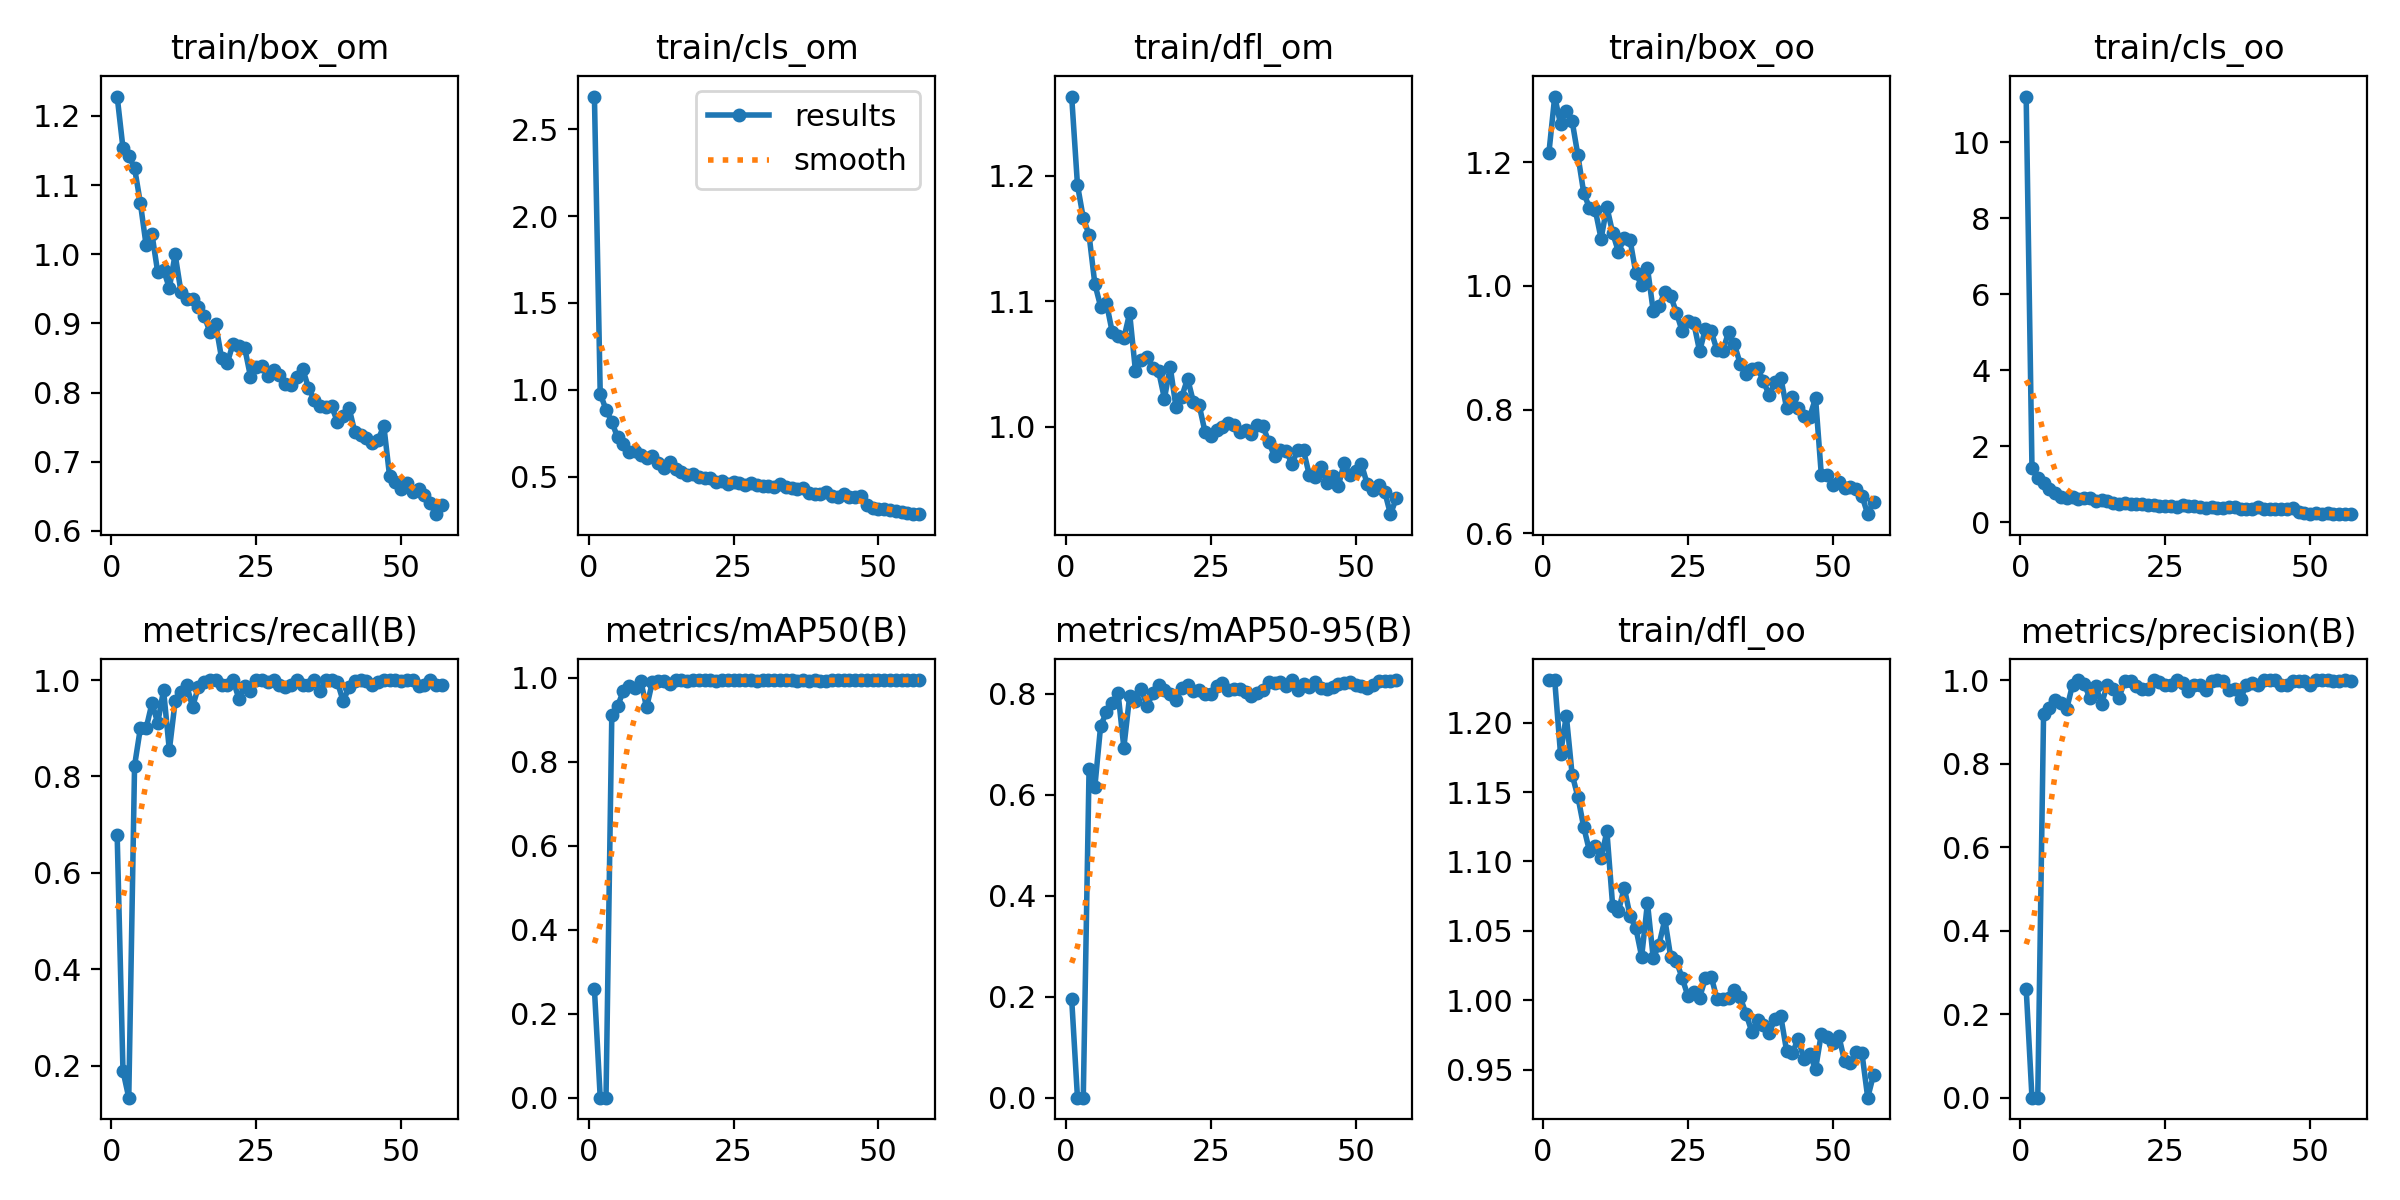

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [ ]:
import os

# Define the folder path
output_folder = "/content/enchance_images"

# Create the folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)
print(f"Folder '{output_folder}' created or already exists.")


Folder '/content/enchance_images' created or already exists.


In [ ]:
from PIL import Image, ImageEnhance
import os

# Define the path to save resultant images
result_dir = '/content/enhance_images'

# Create the directory if it doesn't exist
if not os.path.exists(result_dir):
    os.makedirs(result_dir)

# Path to the image (update this to your actual path in Colab)
image_path = '/content/Opticaldisk-2/train/images/IDRiD_002_jpg.rf.2bb4cf870c9d19719df82228082dd48f.jpg'  # Update this path to your image location in Google Drive

# Open the image
im = Image.open(image_path)

# Create an object of the Brightness class
enhancer = ImageEnhance.Brightness(im)

# Enhance the image (e.g., double the brightness)
enhanced_image = enhancer.enhance(2.0)

# Save the resultant image in the result directory
result_image_path = os.path.join(result_dir, 'enhanced_IDRiD_408.jpg')
enhanced_image.save(result_image_path)

# Optionally, display the enhanced image
enhanced_image.show()


In [ ]:
import os

# Define the folder path
output_folder = "/content/green_channel_images"

# Create the folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)
print(f"Folder '{output_folder}' created or already exists.")


Folder '/content/green_channel_images' created or already exists.


Green channel image saved at: /content/green_channel_images/IDRiD_008_green_channel.jpg


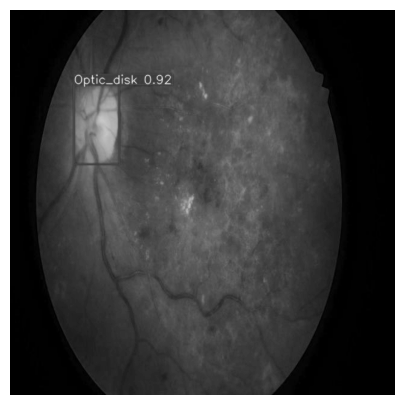

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os  # Import the os module for path operations

# Load the original right image
image_path = "/content/runs/detect/predict/IDRiD_008_jpg.rf.57b077fe471d548dfceafaed248b0d3a.jpg"
right_image = cv2.imread(image_path)

# Extract the green channel
green_channel = right_image[:, :, 1]

# Specify the output folder where you want to save the green channel image
output_folder = "/content/green_channel_images"  # Example path, change as necessary

# Save the green channel image to the folder
green_image_path = os.path.join(output_folder, "IDRiD_008_green_channel.jpg")
cv2.imwrite(green_image_path, green_channel)

print(f"Green channel image saved at: {green_image_path}")

# Display the green channel image
plt.figure(figsize=(5, 5))
plt.imshow(green_channel, cmap='gray')
plt.axis('off')
plt.show()


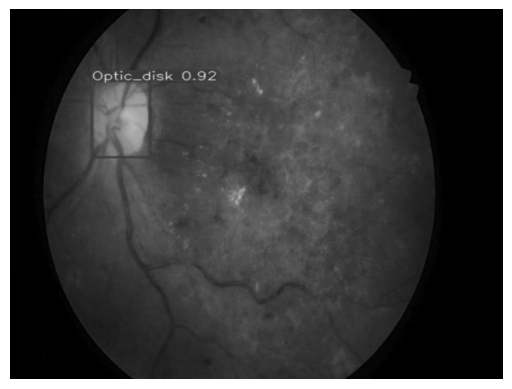

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import os  # Import os for checking local file paths

# Global variables for circle parameters
drawing = False  # True if mouse is pressed
ix, iy = -1, -1  # Starting coordinates of the circle
img = None  # Placeholder for the image

def draw_circle(event, x, y, flags, params):
    global ix, iy, drawing, img

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            img_copy = img.copy()
            cv2.circle(img_copy, center=(ix, iy), radius=int(((x-ix)**2 + (y-iy)**2)**0.5), color=(0, 0, 0), thickness=-1)
            plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
            plt.show()

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.circle(img, center=(ix, iy), radius=int(((x-ix)**2 + (y-iy)**2)**0.5), color=(0, 0, 0), thickness=-1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()

# Function to load image from URL or local path
def load_image(path):
    if os.path.isfile(path):
        # Load image from local file path
        img = cv2.imread(path)
    else:
        # Load image from URL
        resp = urllib.request.urlopen(path)
        img = np.asarray(bytearray(resp.read()), dtype="uint8")
        img = cv2.imdecode(img, cv2.IMREAD_COLOR)
    return img

# Load the image (replace with your image path or URL)
image_path = "/content/green_channel_images/IDRiD_008_green_channel.jpg"
img = load_image(image_path)

# Check if the image was loaded successfully
if img is None:
    print(f"Error: Unable to load image from {image_path}")
    exit()

# Resize the image to fit within the screen dimensions
screen_width, screen_height = 800, 600
img = cv2.resize(img, (screen_width, screen_height))

# Display the image using Matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

# Create a blank figure for drawing with Matplotlib
plt.figure()

# Set mouse callback for drawing circles
cv2.namedWindow("image")
cv2.setMouseCallback("image", draw_circle)

# Keep the window open until 'q' key is pressed
while True:
    cv2.imshow("image", img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Clean up
cv2.destroyAllWindows()


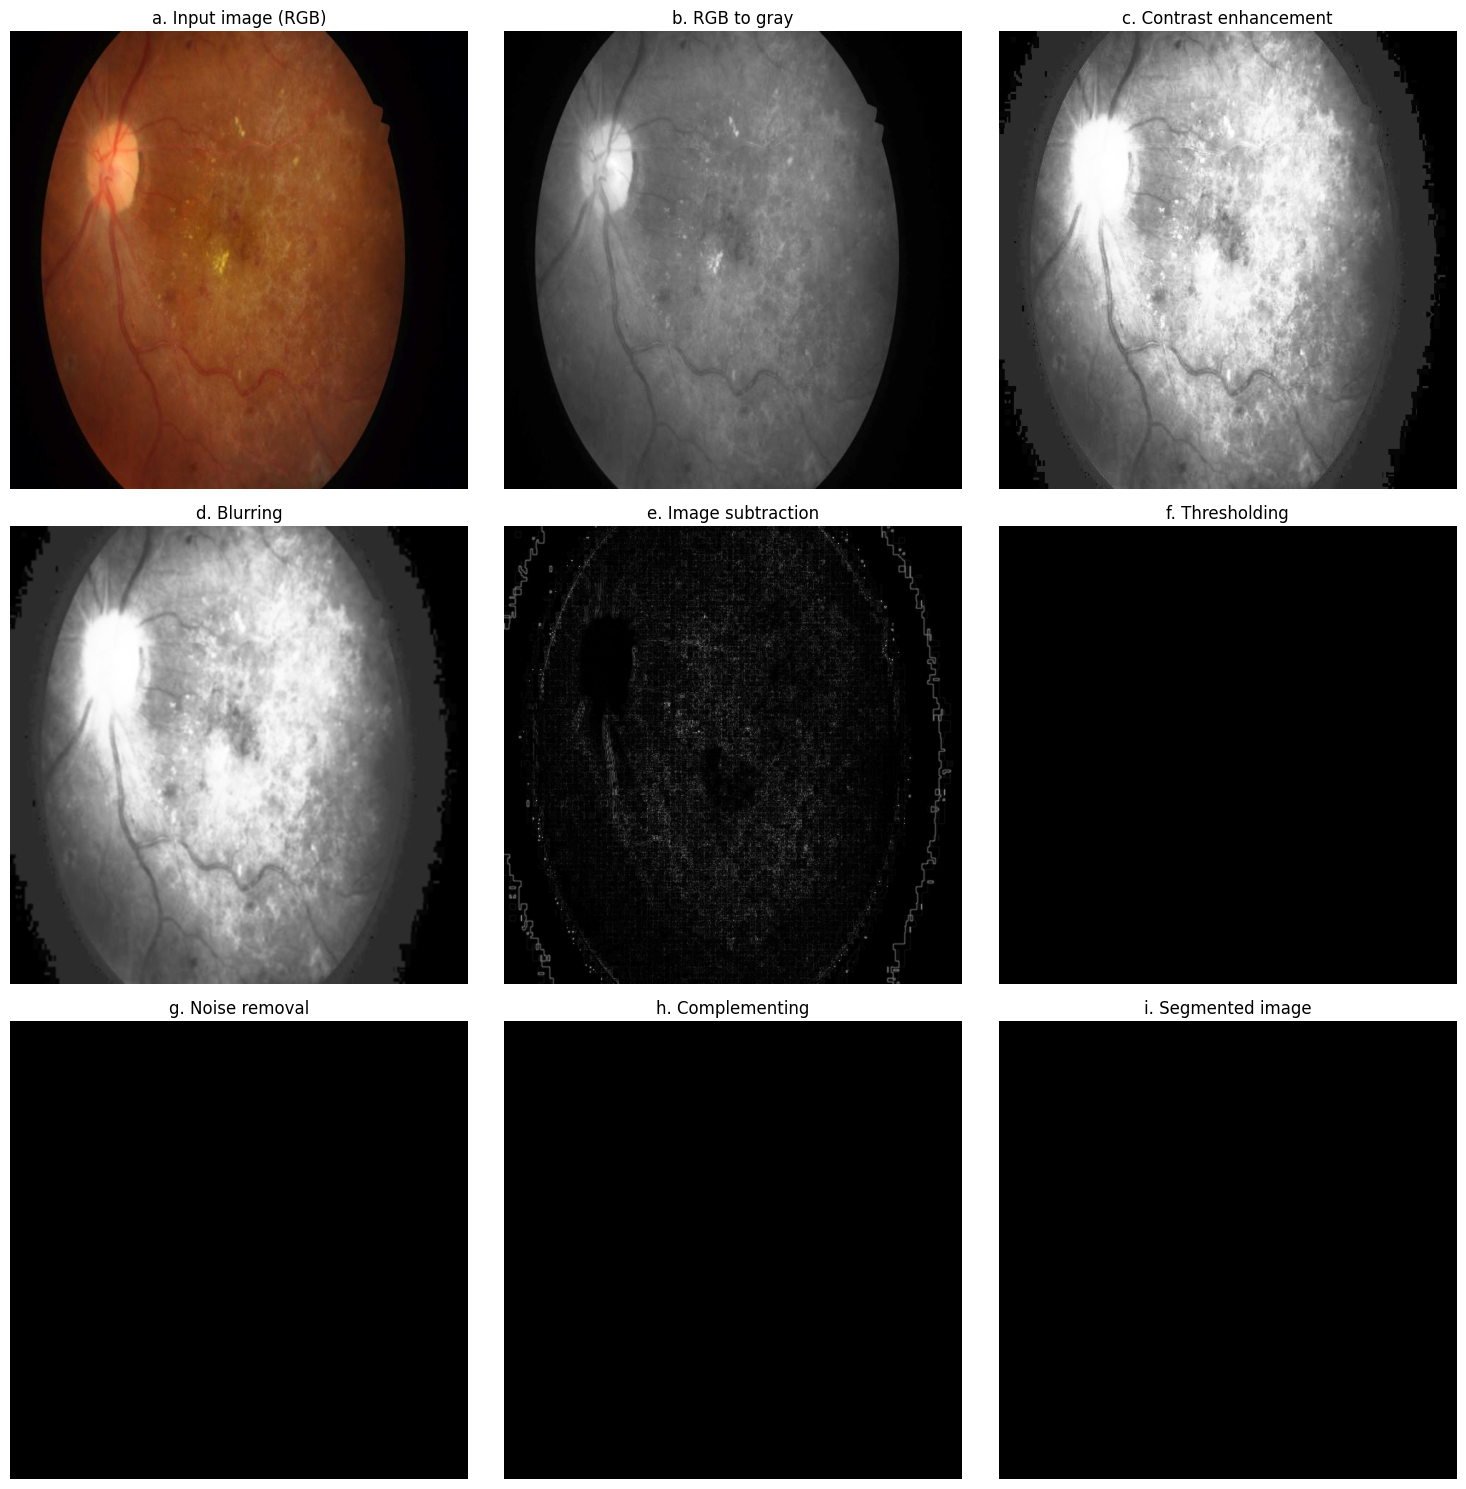

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
image_path = "/content/Opticaldisk-2/test/images/IDRiD_008_jpg.rf.57b077fe471d548dfceafaed248b0d3a.jpg"
input_image = cv2.imread(image_path)

# Step 1: Input image (RGB)
rgb_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Step 2: RGB to Grayscale
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Step 3: Contrast Enhancement
enhanced_image = cv2.equalizeHist(gray_image)

# Step 4: Blurring
blurred_image = cv2.GaussianBlur(enhanced_image, (5, 5), 0)

# Step 5: Image Subtraction
subtracted_image = cv2.absdiff(enhanced_image, blurred_image)

# Step 6: Thresholding
_, thresholded_image = cv2.threshold(subtracted_image, 50, 255, cv2.THRESH_BINARY)

# Step 7: Noise Removal
kernel = np.ones((5, 5), np.uint8)
noise_removed_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_CLOSE, kernel)

# Step 8: Complementing
complemented_image = cv2.bitwise_not(noise_removed_image)

# Step 9: Segmented Image
segmented_image = complemented_image.copy()  # In this context, it's already segmented

# Plot all the steps
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Plot each step with titles
titles = ["a. Input image (RGB)", "b. RGB to gray", "c. Contrast enhancement",
          "d. Blurring", "e. Image subtraction", "f. Thresholding",
          "g. Noise removal", "h. Complementing", "i. Segmented image"]
images = [rgb_image, gray_image, enhanced_image,
          blurred_image, subtracted_image, thresholded_image,
          noise_removed_image, complemented_image, segmented_image]

for i, ax in enumerate(axes.flatten()):
    ax.imshow(images[i], cmap='gray' if len(images[i].shape) == 2 else None)
    ax.set_title(titles[i])
    ax.axis('off')

plt.tight_layout()
plt.show()


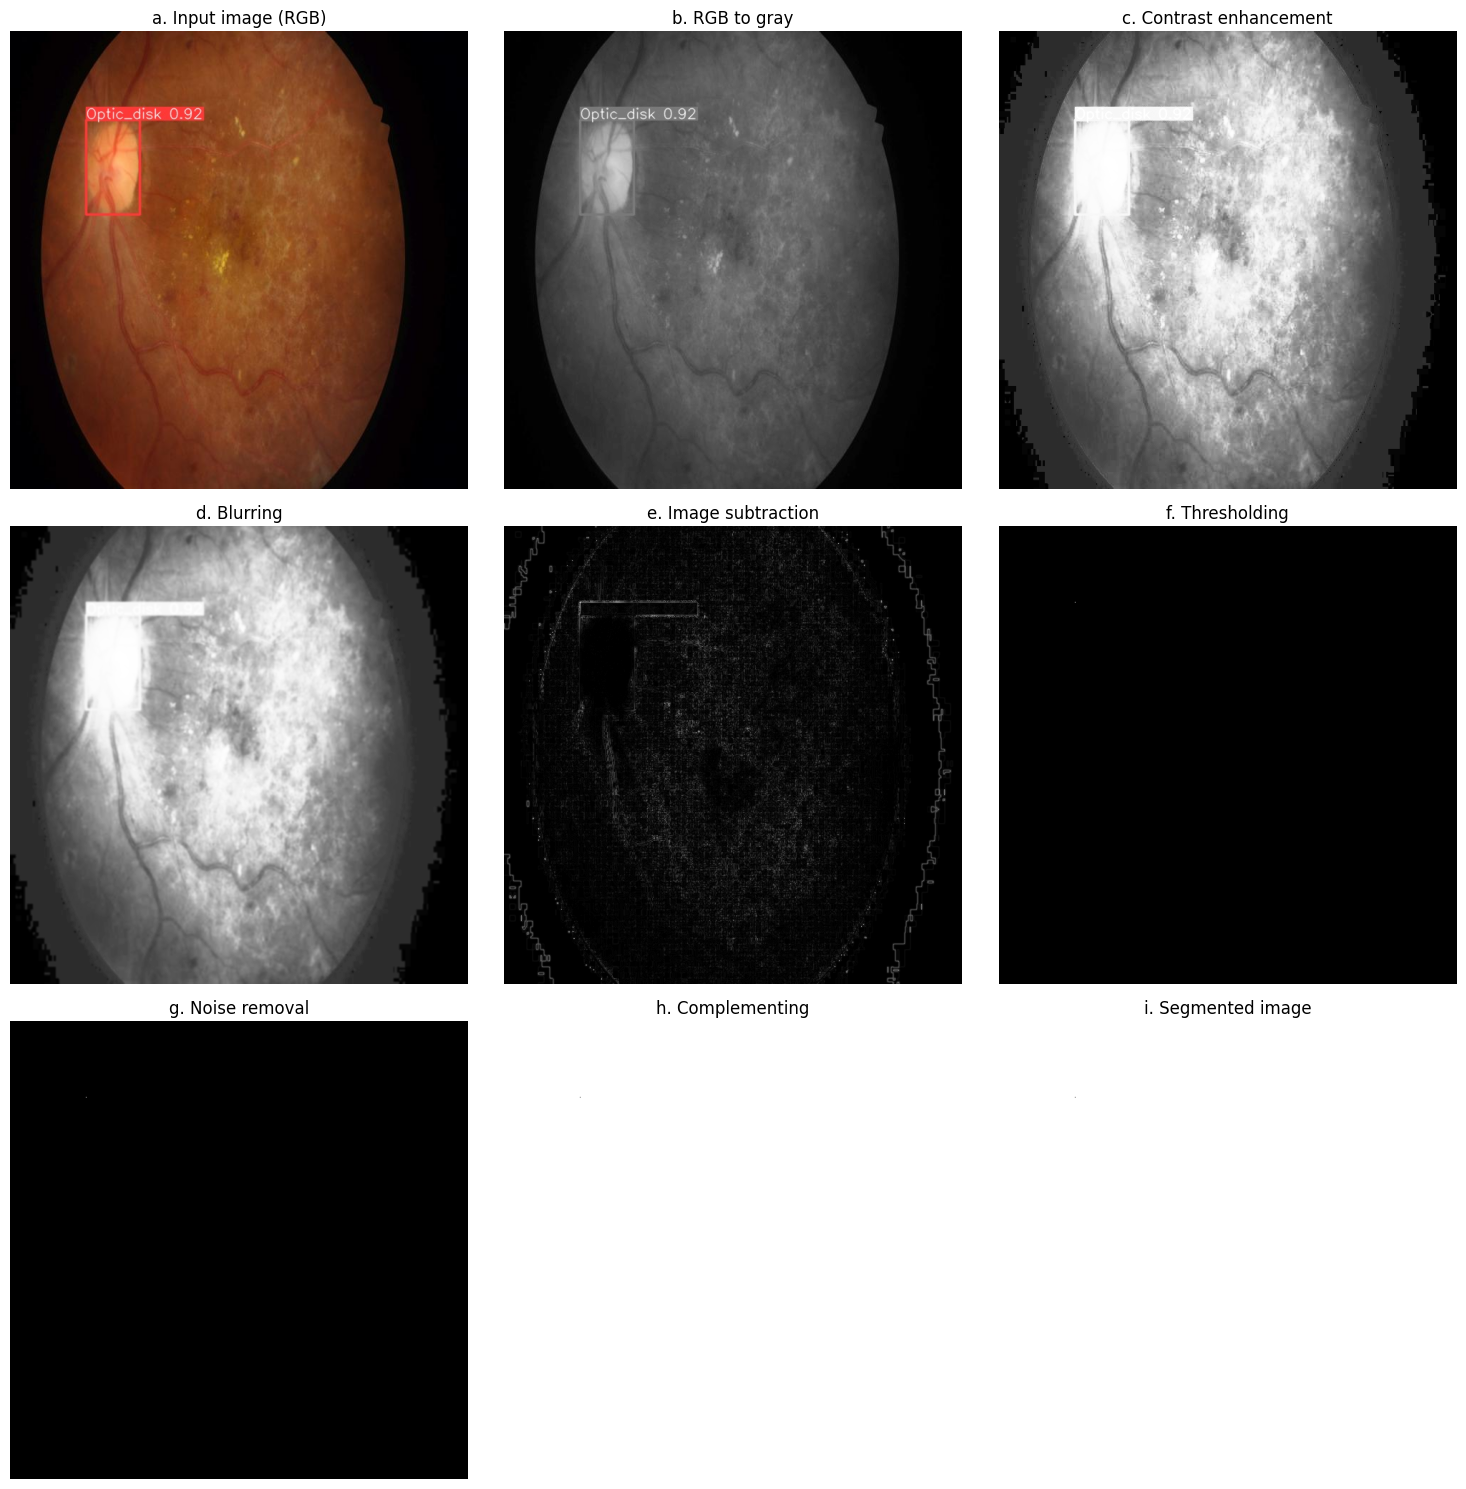

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
image_path = "/content/runs/detect/predict/IDRiD_008_jpg.rf.57b077fe471d548dfceafaed248b0d3a.jpg"
input_image = cv2.imread(image_path)

# Step 1: Input image (RGB)
rgb_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Step 2: RGB to Grayscale
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Step 3: Contrast Enhancement
enhanced_image = cv2.equalizeHist(gray_image)

# Step 4: Blurring
blurred_image = cv2.GaussianBlur(enhanced_image, (5, 5), 0)

# Step 5: Image Subtraction
subtracted_image = cv2.absdiff(enhanced_image, blurred_image)

# Step 6: Thresholding
_, thresholded_image = cv2.threshold(subtracted_image, 50, 255, cv2.THRESH_BINARY)

# Step 7: Noise Removal
kernel = np.ones((5, 5), np.uint8)
noise_removed_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_CLOSE, kernel)

# Step 8: Complementing
complemented_image = cv2.bitwise_not(noise_removed_image)

# Step 9: Segmented Image
segmented_image = complemented_image.copy()  # In this context, it's already segmented

# Plot all the steps
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Plot each step with titles
titles = ["a. Input image (RGB)", "b. RGB to gray", "c. Contrast enhancement",
          "d. Blurring", "e. Image subtraction", "f. Thresholding",
          "g. Noise removal", "h. Complementing", "i. Segmented image"]
images = [rgb_image, gray_image, enhanced_image,
          blurred_image, subtracted_image, thresholded_image,
          noise_removed_image, complemented_image, segmented_image]

for i, ax in enumerate(axes.flatten()):
    ax.imshow(images[i], cmap='gray' if len(images[i].shape) == 2 else None)
    ax.set_title(titles[i])
    ax.axis('off')

plt.tight_layout()
plt.show()
